## Importing the required libraries for our model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential , datasets
from keras.layers import Dense,Flatten

## loading the dataset from keras datasets

In [2]:
(x_train,y_train),(X_test,y_test)= datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 3s 1us/step


In [4]:
# printing the shape of dataset
print(x_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [10]:
#rescaling the image size
x_train, X_test= x_train/255.0, X_test/255.0

## Creating ANN model for classification of images

In [13]:
model= Sequential()

In [14]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [15]:
#getting the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
#compiling the model
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
#run the model
history=model.fit(x_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5017 - accuracy: 0.8236 - val_loss: 0.4345 - val_accuracy: 0.8485
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3777 - accuracy: 0.8633 - val_loss: 0.3887 - val_accuracy: 0.8615
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3384 - accuracy: 0.8769 - val_loss: 0.3877 - val_accuracy: 0.8636
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3134 - accuracy: 0.8855 - val_loss: 0.3539 - val_accuracy: 0.8743
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2962 - accuracy: 0.8911 - val_loss: 0.3666 - val_accuracy: 0.8723
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2828 - accuracy: 0.8949 - val_loss: 0.3536 - val_accuracy: 0.8752
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2688 - accuracy: 0.8993 - val_loss: 0.3628 - val_accuracy:

## Evaluating the performance of our model

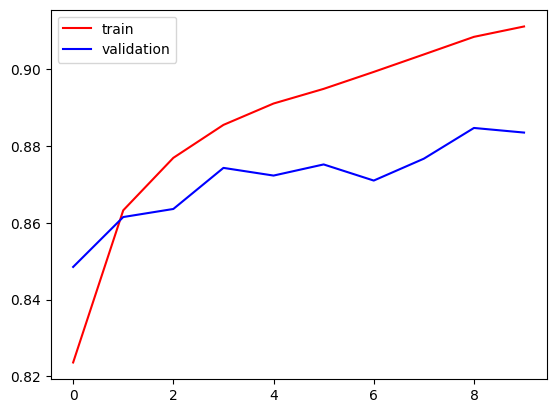

In [23]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [19]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 0s 1ms/step


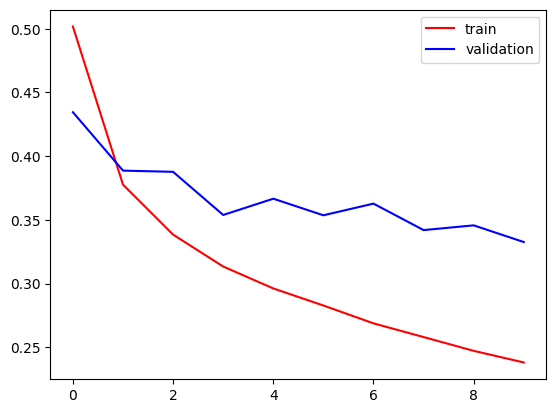

In [24]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

### Our model is working fine on both training and validation dataset